### Домашнее задание по ML №5

##### Имеются данные adult.csv (см. в материалах к занятию)

##### Целевой переменной является уровень дохода income (крайний правый столбец).

##### Описание признаков можно найти по ссылке http://www.cs.toronto.edu/~delve/data/adult/adultDetail.html

##### Получите значения AUC для различных моделей и их параметров. Попробуйте построить модель с улучшенным значением AUC, чем в примерах на занятии.

*Выдержка с сайта:*

`5. Number of Instances`

48842 instances, mix of continuous and discrete (train=32561, test=16281)

45222 if instances with unknown values are removed (train=30162, test=15060)

Split into train-test using MLC++ GenCVFiles (2/3, 1/3 random).

`6. Number of Attributes`

6 continuous, 8 nominal attributes.

`7. Attribute Information:`

age: continuous.

workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.

fnlwgt: continuous.

education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 
10th, Doctorate, 5th-6th, Preschool.

education-num: continuous.

marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.

occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-
inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.

relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.

race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.

sex: Female, Male.

capital-gain: continuous.

capital-loss: continuous.

hours-per-week: continuous.

native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, 
Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, 
Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-
Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

class: >50K, <=50K

`8. Missing Attribute Values:`

7% have missing values.

### 1. Первичный анализ

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('adult.csv')
df.head(10)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
6,29,?,227026,HS-grad,9,Never-married,?,Unmarried,Black,Male,0,0,40,United-States,<=50K
7,63,Self-emp-not-inc,104626,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,3103,0,32,United-States,>50K
8,24,Private,369667,Some-college,10,Never-married,Other-service,Unmarried,White,Female,0,0,40,United-States,<=50K
9,55,Private,104996,7th-8th,4,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,10,United-States,<=50K


In [3]:
# пропущенных значений нет (но есть дефектные: с '?')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
age                48842 non-null int64
workclass          48842 non-null object
fnlwgt             48842 non-null int64
education          48842 non-null object
educational-num    48842 non-null int64
marital-status     48842 non-null object
occupation         48842 non-null object
relationship       48842 non-null object
race               48842 non-null object
gender             48842 non-null object
capital-gain       48842 non-null int64
capital-loss       48842 non-null int64
hours-per-week     48842 non-null int64
native-country     48842 non-null object
income             48842 non-null object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [4]:
df.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [5]:
# список колонок
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

Посмотрим пару стобцов с дефектными значениями (оценим количество строк)

In [6]:
len(df[ df['workclass'] == '?' ].index)

2799

In [7]:
len(df[ df['occupation'] == '?' ].index)

2809

Напишем цикл для определения масштаба проблемы "дефектных значений"

In [8]:
columns_with_questions = [] # список колонок, содержащих значение '?'
set_question_rows = set() # множество индексов строк, содержащих значение '?'
dict_question_rows = {}
columns = list(df.columns)

for column in columns:
    try:
        print('Для поля {0} значений с "?": {1} шт.'.format(column, len(df[ df[column] == '?' ].index)))
        if len(df[ df[column] == '?' ].index) > 0:
            columns_with_questions.append(column)
        set_question_rows.update(set(df[ df[column] == '?' ].index))
        d1 = {"Russia":"Moscow", "USA":"Washington"}
        dict_question_rows[column]=list(df[ df[column] == '?' ].index)
    except:
        print('Для поля {0} значений с "?": {1} шт.'.format(column , 0))

print ('\nСписок полей с таким значением: ', columns_with_questions)

print('\nДоля строк с дефектными значениями: {:.2%}'.format(len(set_question_rows)/df.shape[0]))

C:\Users\User\Anaconda3\lib\site-packages\pandas\core\ops.py:1167: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


Для поля age значений с "?": 0 шт.
Для поля workclass значений с "?": 2799 шт.
Для поля fnlwgt значений с "?": 0 шт.
Для поля education значений с "?": 0 шт.
Для поля educational-num значений с "?": 0 шт.
Для поля marital-status значений с "?": 0 шт.
Для поля occupation значений с "?": 2809 шт.
Для поля relationship значений с "?": 0 шт.
Для поля race значений с "?": 0 шт.
Для поля gender значений с "?": 0 шт.
Для поля capital-gain значений с "?": 0 шт.
Для поля capital-loss значений с "?": 0 шт.
Для поля hours-per-week значений с "?": 0 шт.
Для поля native-country значений с "?": 857 шт.
Для поля income значений с "?": 0 шт.

Список полей с таким значением:  ['workclass', 'occupation', 'native-country']

Доля строк с дефектными значениями: 7.41%


Дропнуть 7,41 процента данных - слишком легкий путь. Поработаем с "дефектными" значениями.

Предполагаю, что искомые значения в основном могут встречаться по нескольку раз в одной строке (во всех столбцах из списка columns_with_questions)
, но нужно проверить. Напишем еще один цикл для этого.

### 2. Обработка "дефектных" значений

In [9]:
for column in columns_with_questions:

    change = len(df[ df[column] == '?' ].index)
    df[column] = df[column].replace(['?'], method='ffill')
    print('Для поля {0} методом "ffill" заменено {1} значений'.format(column, change))

Для поля workclass методом "ffill" заменено 2799 значений
Для поля occupation методом "ffill" заменено 2809 значений
Для поля native-country методом "ffill" заменено 857 значений


In [10]:
# можно было бы заполнить самыми распространенными значениями, 
# но это больше исказит картину, чем применение метода замены на предыдущее значение

for column in columns_with_questions:
    most_popular = df[column].value_counts().index[0]
    most_popular_value = df[column].value_counts().values[0]
    share = most_popular_value/len(df[column])
    print('Для поля "{0}" самое популярное значение "{1}" (доля {2:.2%})'.format(column, most_popular, share))

Для поля "workclass" самое популярное значение "Private" (доля 73.75%)
Для поля "occupation" самое популярное значение "Prof-specialty" (доля 13.42%)
Для поля "native-country" самое популярное значение "United-States" (доля 91.34%)


In [11]:
# для 'occupation' вообще неочевидно, стоит ли заполнять самым популярным значением
df['occupation'].value_counts()

Prof-specialty       6557
Craft-repair         6510
Exec-managerial      6459
Adm-clerical         5935
Sales                5813
Other-service        5202
Machine-op-inspct    3226
Transport-moving     2507
Handlers-cleaners    2223
Farming-fishing      1570
Tech-support         1531
Protective-serv      1031
Priv-house-serv       261
Armed-Forces           17
Name: occupation, dtype: int64

In [12]:
# Данные очищены от дефектных значений. ПОсмотрим на них.
df.head(10)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,Private,103497,Some-college,10,Never-married,Machine-op-inspct,Own-child,White,Female,0,0,30,United-States,<=50K
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
6,29,Private,227026,HS-grad,9,Never-married,Other-service,Unmarried,Black,Male,0,0,40,United-States,<=50K
7,63,Self-emp-not-inc,104626,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,3103,0,32,United-States,>50K
8,24,Private,369667,Some-college,10,Never-married,Other-service,Unmarried,White,Female,0,0,40,United-States,<=50K
9,55,Private,104996,7th-8th,4,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,10,United-States,<=50K


In [13]:
# при этом сохранили все 48842 строк
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
age                48842 non-null int64
workclass          48842 non-null object
fnlwgt             48842 non-null int64
education          48842 non-null object
educational-num    48842 non-null int64
marital-status     48842 non-null object
occupation         48842 non-null object
relationship       48842 non-null object
race               48842 non-null object
gender             48842 non-null object
capital-gain       48842 non-null int64
capital-loss       48842 non-null int64
hours-per-week     48842 non-null int64
native-country     48842 non-null object
income             48842 non-null object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


Проверим, какие есть уникальные значения ('fnlwgt не смотрим, там много)

In [14]:
for column in columns:
    if column != 'fnlwgt':
        print(column,'\n', sorted(df[column].unique()),'\n', len(df[column].unique()), ' уникальных значений\n')

age 
 [17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90] 
 74  уникальных значений

workclass 
 ['Federal-gov', 'Local-gov', 'Never-worked', 'Private', 'Self-emp-inc', 'Self-emp-not-inc', 'State-gov', 'Without-pay'] 
 8  уникальных значений

education 
 ['10th', '11th', '12th', '1st-4th', '5th-6th', '7th-8th', '9th', 'Assoc-acdm', 'Assoc-voc', 'Bachelors', 'Doctorate', 'HS-grad', 'Masters', 'Preschool', 'Prof-school', 'Some-college'] 
 16  уникальных значений

educational-num 
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16] 
 16  уникальных значений

marital-status 
 ['Divorced', 'Married-AF-spouse', 'Married-civ-spouse', 'Married-spouse-absent', 'Never-married', 'Separated', 'Widowed'] 
 7  уникальных значений

occupation 
 ['Adm-cler

Предполагаю, что есть численные значения, равные нулю, которые наверно встречаются сильно чаще других. Проверим.

In [15]:
# Проверим для'capital-gain'. Так и есть: ноли превалируют

In [16]:
df['capital-gain'].value_counts()[:10]

0        44807
15024      513
7688       410
7298       364
99999      244
3103       152
5178       146
5013       117
4386       108
8614        82
Name: capital-gain, dtype: int64

In [17]:
len(df[df['capital-gain']==0]) / len(df['capital-gain'])

0.9173866754023177

In [18]:
# Проверим для'capital-loss'. Так и есть: ноли тоже превалируют

In [19]:
df['capital-loss'].value_counts()[:10]

0       46560
1902      304
1977      253
1887      233
2415       72
1485       71
1848       67
1590       62
1602       62
1876       59
Name: capital-loss, dtype: int64

In [20]:
len(df[df['capital-loss']==0]) / len(df['capital-loss'])

0.9532779165472339

### 3. Обработка категориальных переменных, категоризация

**Для этих полей сделаем замену категориальных переменных на числовую (бинарную):**

'gender', 'capital-gain', 'capital-loss', 'income'

**Для этих полей сделаем get_dummies:**

'workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'native-country'

**Для этих полей сделаем категоризацию:**

'age', 'hours-per-week'

**Для этих полей все оставим как есть:**

'educational-num'

*Делаем замену категориальных переменных на числовую (бинарную) для 'gender'*

In [21]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [22]:
le.fit( df['gender'] )

LabelEncoder()

In [23]:
le.classes_

array(['Female', 'Male'], dtype=object)

In [24]:
df['gender'] = pd.Series( data = le.transform( df['gender'] ) )

In [25]:
df.head(5)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,1,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,1,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,1,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,1,7688,0,40,United-States,>50K
4,18,Private,103497,Some-college,10,Never-married,Machine-op-inspct,Own-child,White,0,0,0,30,United-States,<=50K


*Делаем замену категориальных переменных на числовую (бинарную) для 'capital-gain'*

In [26]:
capital_gain_list = []

for i in df['capital-gain']:
    if i == 0:
        capital_gain_list.append(i)
    else:
        capital_gain_list.append(1)
        

In [27]:
len(df['capital-gain']) == len(capital_gain_list)

True

In [28]:
df['capital-gain'] = capital_gain_list

In [29]:
df.head(10)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,1,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,1,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,1,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,1,1,0,40,United-States,>50K
4,18,Private,103497,Some-college,10,Never-married,Machine-op-inspct,Own-child,White,0,0,0,30,United-States,<=50K
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,1,0,0,30,United-States,<=50K
6,29,Private,227026,HS-grad,9,Never-married,Other-service,Unmarried,Black,1,0,0,40,United-States,<=50K
7,63,Self-emp-not-inc,104626,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,1,1,0,32,United-States,>50K
8,24,Private,369667,Some-college,10,Never-married,Other-service,Unmarried,White,0,0,0,40,United-States,<=50K
9,55,Private,104996,7th-8th,4,Married-civ-spouse,Craft-repair,Husband,White,1,0,0,10,United-States,<=50K


*Делаем замену категориальных переменных на числовую (бинарную) для 'capital-loss'*

In [30]:
capital_loss_list = []

for i in df['capital-loss']:
    if i == 0:
        capital_loss_list.append(i)
    else:
        capital_loss_list.append(1)

In [31]:
len(df['capital-loss']) == len(capital_loss_list)

True

In [32]:
df['capital-loss'] = capital_loss_list

In [33]:
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,1,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,1,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,1,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,1,1,0,40,United-States,>50K
4,18,Private,103497,Some-college,10,Never-married,Machine-op-inspct,Own-child,White,0,0,0,30,United-States,<=50K


*Делаем замену категориальных переменных на числовую (бинарную) для 'income'*

In [34]:
le2 = LabelEncoder()

In [35]:
le2.fit( df['income'] )

LabelEncoder()

In [36]:
le2.classes_

array(['<=50K', '>50K'], dtype=object)

In [37]:
df['income'] = pd.Series( data = le2.transform( df['income'] ) )

In [38]:
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,1,0,0,40,United-States,0
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,1,0,0,50,United-States,0
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,1,0,0,40,United-States,1
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,1,1,0,40,United-States,1
4,18,Private,103497,Some-college,10,Never-married,Machine-op-inspct,Own-child,White,0,0,0,30,United-States,0


*Для этих полей сделаем get_dummies:*

*'workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'native-country'*

In [39]:
# попробуем выбрать какие-нибудь признаки
columns_to_encode = [ 'workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'native-country' ]

# столбец sport является категориальной переменной
# переведем ее в значения 0 и 1, добавив столбцы с соответствующими названиями
df_encoded = pd.get_dummies( df, prefix=None, prefix_sep='_', columns=columns_to_encode)

df_encoded.head()

,age,fnlwgt,educational-num,gender,capital-gain,capital-loss,hours-per-week,income,workclass_Federal-gov,workclass_Local-gov,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,25,226802,7,1,0,0,40,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,38,89814,9,1,0,0,50,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,28,336951,12,1,0,0,40,1,0,1,...,0,0,0,0,0,0,0,1,0,0
3,44,160323,10,1,1,0,40,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4,18,103497,10,0,0,0,30,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [40]:
# убедимся, все ли хорошо
list(df_encoded.columns)

['age',
 'fnlwgt',
 'educational-num',
 'gender',
 'capital-gain',
 'capital-loss',
 'hours-per-week',
 'income',
 'workclass_Federal-gov',
 'workclass_Local-gov',
 'workclass_Never-worked',
 'workclass_Private',
 'workclass_Self-emp-inc',
 'workclass_Self-emp-not-inc',
 'workclass_State-gov',
 'workclass_Without-pay',
 'education_10th',
 'education_11th',
 'education_12th',
 'education_1st-4th',
 'education_5th-6th',
 'education_7th-8th',
 'education_9th',
 'education_Assoc-acdm',
 'education_Assoc-voc',
 'education_Bachelors',
 'education_Doctorate',
 'education_HS-grad',
 'education_Masters',
 'education_Preschool',
 'education_Prof-school',
 'education_Some-college',
 'marital-status_Divorced',
 'marital-status_Married-AF-spouse',
 'marital-status_Married-civ-spouse',
 'marital-status_Married-spouse-absent',
 'marital-status_Never-married',
 'marital-status_Separated',
 'marital-status_Widowed',
 'occupation_Adm-clerical',
 'occupation_Armed-Forces',
 'occupation_Craft-repair',
 'o

*Для этих полей сделаем категоризацию:*

*'age', 'hours-per-week'*

In [41]:
# делим людей на возрастные группы
def process_old(old):
    if old < 21:
        return 'young'
    elif 21 <= old < 30:
        return 'adult'
    elif 30 <= old < 40:
        return 'more_adult'
    elif 40 <= old < 50:
        return 'pre_retirement'
    elif 50 <= old < 60:
        return 'pensioner'
    elif 60 <= old:
        return 'old_man'

In [42]:
df_encoded.head()

,age,fnlwgt,educational-num,gender,capital-gain,capital-loss,hours-per-week,income,workclass_Federal-gov,workclass_Local-gov,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,25,226802,7,1,0,0,40,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,38,89814,9,1,0,0,50,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,28,336951,12,1,0,0,40,1,0,1,...,0,0,0,0,0,0,0,1,0,0
3,44,160323,10,1,1,0,40,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4,18,103497,10,0,0,0,30,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [43]:
df_encoded['age'] = df_encoded['age'].apply(lambda x: process_old(x))

In [44]:
df_encoded.head()

,age,fnlwgt,educational-num,gender,capital-gain,capital-loss,hours-per-week,income,workclass_Federal-gov,workclass_Local-gov,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,adult,226802,7,1,0,0,40,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,more_adult,89814,9,1,0,0,50,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,adult,336951,12,1,0,0,40,1,0,1,...,0,0,0,0,0,0,0,1,0,0
3,pre_retirement,160323,10,1,1,0,40,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4,young,103497,10,0,0,0,30,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [45]:
# вторая полезная функция

In [46]:
# делим количество часов в неделю на категории
def process_hours(hours):
    if hours < 10:
        return 'loafers'
    elif 10 <= hours < 20:
        return '10_20_hours_workers'
    elif 20 <= hours < 30:
        return '20_30_hours_workers'
    elif 30 <= hours < 40:
        return '30_40_hours_workers'
    elif 40 <= hours < 50:
        return '40_50_hours_workers'
    elif 50 <= hours < 60:
        return '50_60_hours_workers'
    elif 60 <= hours < 70:
        return '60_70_hours_workers'
    elif 70 <= hours < 80:
        return '70_80_hours_workers'
    elif 80 <= hours < 0:
        return '80_90_hours_workers'
    elif 90 <= hours:
        return 'workaholics'

In [47]:
df_encoded['hours-per-week'] = df_encoded['hours-per-week'].apply(lambda x: process_hours(x))

In [48]:
df_encoded.head()

,age,fnlwgt,educational-num,gender,capital-gain,capital-loss,hours-per-week,income,workclass_Federal-gov,workclass_Local-gov,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,adult,226802,7,1,0,0,40_50_hours_workers,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,more_adult,89814,9,1,0,0,50_60_hours_workers,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,adult,336951,12,1,0,0,40_50_hours_workers,1,0,1,...,0,0,0,0,0,0,0,1,0,0
3,pre_retirement,160323,10,1,1,0,40_50_hours_workers,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4,young,103497,10,0,0,0,30_40_hours_workers,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [49]:
# теперь заэнкодим оставшиеся категориальные переменные
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Columns: 105 entries, age to native-country_Yugoslavia
dtypes: int32(2), int64(4), object(2), uint8(97)
memory usage: 7.1+ MB


In [50]:
prepared_data = pd.get_dummies( df_encoded)

In [51]:
prepared_data.head()

,fnlwgt,educational-num,gender,capital-gain,capital-loss,income,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,...,age_young,hours-per-week_10_20_hours_workers,hours-per-week_20_30_hours_workers,hours-per-week_30_40_hours_workers,hours-per-week_40_50_hours_workers,hours-per-week_50_60_hours_workers,hours-per-week_60_70_hours_workers,hours-per-week_70_80_hours_workers,hours-per-week_loafers,hours-per-week_workaholics
0,226802,7,1,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
1,89814,9,1,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
2,336951,12,1,0,0,1,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
3,160323,10,1,1,0,1,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
4,103497,10,0,0,0,0,0,0,0,1,...,1,0,0,1,0,0,0,0,0,0


In [52]:
# проверим, все ли нужные колонки обработались
list(prepared_data.columns)

['fnlwgt',
 'educational-num',
 'gender',
 'capital-gain',
 'capital-loss',
 'income',
 'workclass_Federal-gov',
 'workclass_Local-gov',
 'workclass_Never-worked',
 'workclass_Private',
 'workclass_Self-emp-inc',
 'workclass_Self-emp-not-inc',
 'workclass_State-gov',
 'workclass_Without-pay',
 'education_10th',
 'education_11th',
 'education_12th',
 'education_1st-4th',
 'education_5th-6th',
 'education_7th-8th',
 'education_9th',
 'education_Assoc-acdm',
 'education_Assoc-voc',
 'education_Bachelors',
 'education_Doctorate',
 'education_HS-grad',
 'education_Masters',
 'education_Preschool',
 'education_Prof-school',
 'education_Some-college',
 'marital-status_Divorced',
 'marital-status_Married-AF-spouse',
 'marital-status_Married-civ-spouse',
 'marital-status_Married-spouse-absent',
 'marital-status_Never-married',
 'marital-status_Separated',
 'marital-status_Widowed',
 'occupation_Adm-clerical',
 'occupation_Armed-Forces',
 'occupation_Craft-repair',
 'occupation_Exec-managerial',

### 4. Подготовка данных (разбиение на train и test, нормирование данных)

In [53]:
# Разобъем данные на train в размере 80% и test в размере 20%
x = prepared_data.drop(['income'], axis=1, inplace=False)
y = prepared_data['income']

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state=42)

In [54]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(39073, 117)
(39073,)
(9769, 117)
(9769,)


Нормируем данные

In [55]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [56]:
x_train_normed=pd.DataFrame(scaler.fit_transform(x_train), columns=x_train.columns)
x_train_normed.head()

C:\Users\User\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype uint8, int32, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype uint8, int32, int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


,fnlwgt,educational-num,gender,capital-gain,capital-loss,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,...,age_young,hours-per-week_10_20_hours_workers,hours-per-week_20_30_hours_workers,hours-per-week_30_40_hours_workers,hours-per-week_40_50_hours_workers,hours-per-week_50_60_hours_workers,hours-per-week_60_70_hours_workers,hours-per-week_70_80_hours_workers,hours-per-week_loafers,hours-per-week_workaholics
0,-0.421839,-0.029836,0.703432,-0.299736,-0.223883,-0.178385,-0.269023,-0.015179,0.596062,-0.196808,...,-0.28467,-0.199043,-0.281506,-0.357506,0.885479,-0.369464,-0.239461,-0.120147,-0.1235,-0.06784
1,-0.138604,-1.585248,0.703432,-0.299736,-0.223883,-0.178385,-0.269023,-0.015179,-1.677678,-0.196808,...,-0.28467,-0.199043,-0.281506,2.797155,-1.129332,-0.369464,-0.239461,-0.120147,-0.1235,-0.06784
2,-0.161041,-0.418689,0.703432,-0.299736,-0.223883,-0.178385,3.717152,-0.015179,-1.677678,-0.196808,...,-0.28467,-0.199043,-0.281506,-0.357506,0.885479,-0.369464,-0.239461,-0.120147,-0.1235,-0.06784
3,-0.605742,-0.418689,-1.421602,-0.299736,-0.223883,-0.178385,-0.269023,-0.015179,0.596062,-0.196808,...,-0.28467,-0.199043,-0.281506,-0.357506,0.885479,-0.369464,-0.239461,-0.120147,-0.1235,-0.06784
4,-1.529544,0.359017,0.703432,-0.299736,-0.223883,-0.178385,-0.269023,-0.015179,0.596062,-0.196808,...,-0.28467,-0.199043,-0.281506,-0.357506,-1.129332,2.706622,-0.239461,-0.120147,-0.1235,-0.06784


In [57]:
x_test_normed=pd.DataFrame(scaler.fit_transform(x_test), columns=x_test.columns)
x_test_normed.head()

C:\Users\User\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype uint8, int32, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype uint8, int32, int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


,fnlwgt,educational-num,gender,capital-gain,capital-loss,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,...,age_young,hours-per-week_10_20_hours_workers,hours-per-week_20_30_hours_workers,hours-per-week_30_40_hours_workers,hours-per-week_40_50_hours_workers,hours-per-week_50_60_hours_workers,hours-per-week_60_70_hours_workers,hours-per-week_70_80_hours_workers,hours-per-week_loafers,hours-per-week_workaholics
0,-1.472342,-0.421925,-1.413671,-0.301495,-0.211162,-0.179823,-0.27005,-0.010118,0.598436,-0.188732,...,-0.276539,-0.207163,-0.275895,-0.357673,0.867707,-0.36257,-0.237834,-0.114767,-0.108178,-0.059098
1,-0.722959,-0.421925,0.707378,-0.301495,-0.211162,-0.179823,-0.27005,-0.010118,0.598436,-0.188732,...,-0.276539,-0.207163,-0.275895,-0.357673,0.867707,-0.36257,-0.237834,-0.114767,-0.108178,-0.059098
2,-0.180856,1.135671,-1.413671,3.316810,-0.211162,-0.179823,-0.27005,-0.010118,0.598436,-0.188732,...,-0.276539,-0.207163,-0.275895,-0.357673,0.867707,-0.36257,-0.237834,-0.114767,-0.108178,-0.059098
3,-0.028003,-0.421925,0.707378,-0.301495,-0.211162,-0.179823,-0.27005,-0.010118,0.598436,-0.188732,...,-0.276539,-0.207163,-0.275895,-0.357673,0.867707,-0.36257,-0.237834,-0.114767,-0.108178,-0.059098
4,0.828207,1.135671,-1.413671,-0.301495,-0.211162,-0.179823,-0.27005,-0.010118,0.598436,-0.188732,...,-0.276539,-0.207163,-0.275895,2.795852,-1.152462,-0.36257,-0.237834,-0.114767,-0.108178,-0.059098


Используем Метод главных компонент (PCA) для оценки полезности фич

In [58]:
import matplotlib.pyplot as plt

Text(0,0.5,'explained_variance_ratio_')

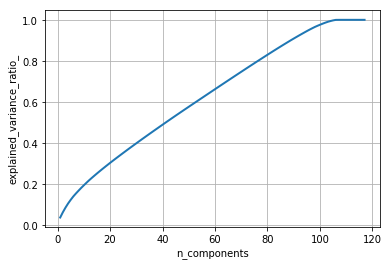

In [59]:
from sklearn.decomposition import PCA

pca = PCA().fit(x_train_normed)

cum_evr = np.cumsum(pca.explained_variance_ratio_)
xs = np.arange(cum_evr.size) + 1
plt.plot(xs, cum_evr, linewidth=2)
plt.grid()
plt.xlabel('n_components')
plt.ylabel('explained_variance_ratio_')

In [60]:
# Кажется, большая часть фичей важна, примерно 105 признаков из 117 объясняют всю дисперсию

### 5.1. Построение и оценка модели: LogisticRegression

In [61]:
from sklearn.linear_model import LogisticRegression

In [62]:
model = LogisticRegression()

In [63]:
# обучаем модель

model.fit( x_train_normed, y_train )


C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [64]:
predictions = model.predict_proba( x_test_normed )

In [65]:
model.predict(x_test_normed)

array([0, 0, 1, ..., 0, 0, 1])

In [66]:
predictions

array([[9.84162421e-01, 1.58375792e-02],
       [9.27237165e-01, 7.27628352e-02],
       [4.44565576e-01, 5.55434424e-01],
       ...,
       [6.47805240e-01, 3.52194760e-01],
       [9.99697017e-01, 3.02983371e-04],
       [2.27282254e-01, 7.72717746e-01]])

Считаем метрики руками

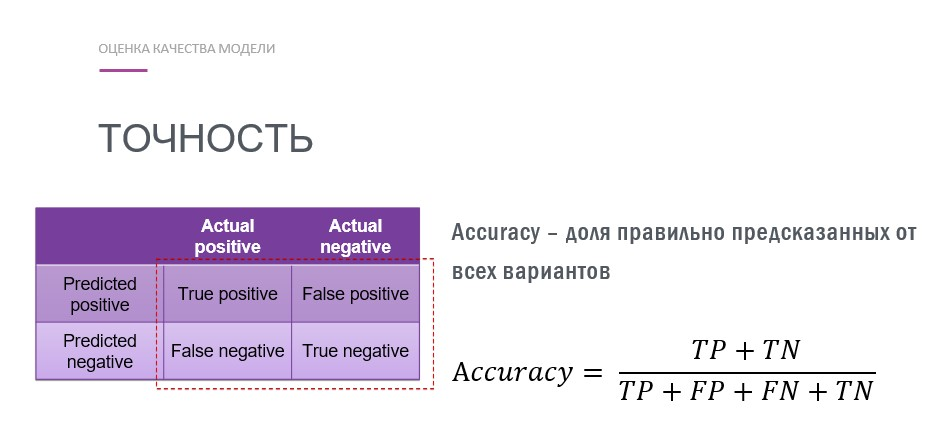

In [74]:
from IPython.display import Image
Image("Screenshot_1.jpg")

In [67]:
# сравниваем факт с предсказаниями
threshold = 0.5 # этот порог чувствительности можно поменять
all_lines_count = 0
counter = 0

for line in zip( predictions[:, 1], y_test ):
    if (line[1]==1 and line[0] >= threshold) or (line[1]==0 and line[0] < threshold):
        counter += 1
    all_lines_count += 1

In [78]:
print('Accuracy: {:2%}'.format(counter / all_lines_count))


Accuracy: 85.290204%


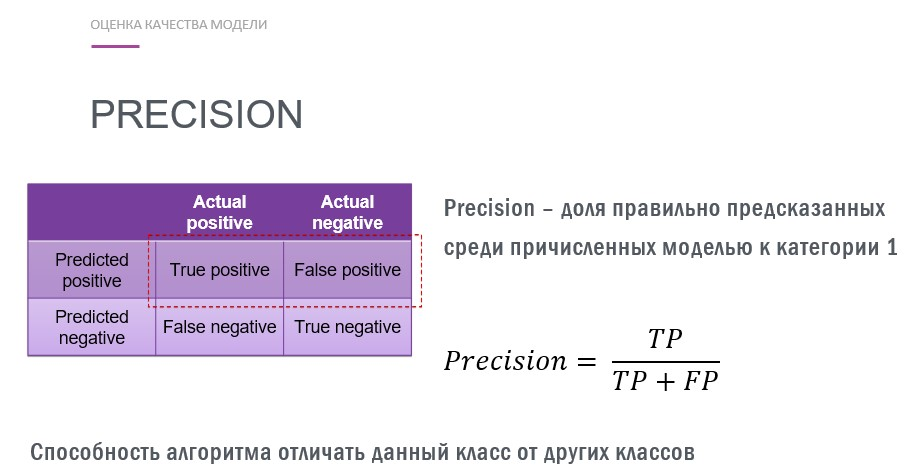

In [88]:
Image("Screenshot_2.jpg")

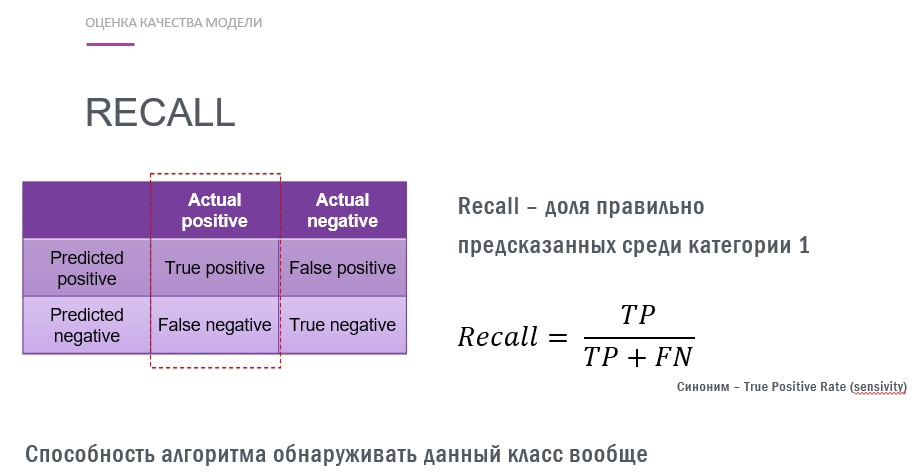

In [89]:
Image("Screenshot_3.jpg")

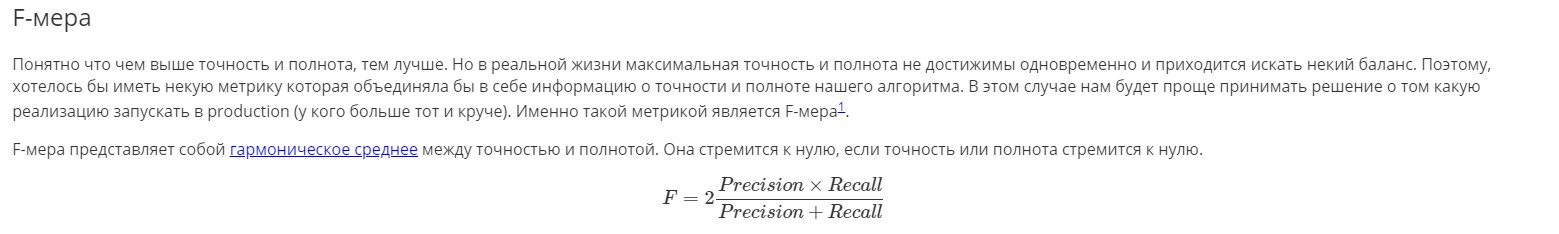

In [91]:
Image("Screenshot_4.jpg")

In [112]:
def acc_prec_rec_f1_custom(y, y_pred):
    import numpy as np
    import pandas as pd
    
    y = pd.Series(list(y))
    y_pred = pd.Series(list(y_pred))
    
    # рассчитываем значения
    df = pd.concat([y,y_pred], axis=1, join='inner',ignore_index=True)
    df['TP'] = ((df[0] == 1) & (df[1] == 1))
    df['FP'] = ((df[0] == 0) & (df[1] == 1))
    df['FN'] = ((df[0] == 1) & (df[1] == 0))
    df['TN'] = ((df[0] == 0) & (df[1] == 0)) 
    
   
    TP = np.sum(df['TP'])
    FP = np.sum(df['FP'])
    FN = np.sum(df['FN'])
    TN = np.sum(df['TN'])
    
    
    # считаем accuracy
    accur = (TP + TN) / (TP + TN + FP + FN)
    prec = TP / (TP + FP) # способност алгоритма отличать данный класс от других классов
    recall = TP / (TP + FN) # способност алгоритма обнаруживать класс в целом
    f1 = (2 * prec * recall) / (prec + recall)
    #print('accuracy: ', accur)
    return accur, prec, recall, f1

In [113]:
prediction = model.predict(x_test_normed)
prediction

array([0, 0, 1, ..., 0, 0, 1])

In [114]:
print('Precision: {:2%}'.format(acc_prec_rec_f1_custom(y_test, prediction)[1]))
print('Recall: {:2%}'.format(acc_prec_rec_f1_custom(y_test, prediction)[2]))
print('F1-score: {:2%}'.format(acc_prec_rec_f1_custom(y_test, prediction)[3]))

#acc_prec_rec_f1_custom(y_test, prediction)

Precision: 72.018585%
Recall: 60.917031%
F1-score: 66.004258%


In [115]:
def conf_matrix_custom(y, y_pred, print_matrix=False):
    import numpy as np
    import pandas as pd
    
    y = pd.Series(list(y))
    y_pred = pd.Series(list(y_pred))
    
    # рассчитываем значения
    df = pd.concat([y,y_pred], axis=1, join='inner',ignore_index=True)
    df['TP'] = ((df[0] == 1) & (df[1] == 1))
    df['FP'] = ((df[0] == 0) & (df[1] == 1))
    df['FN'] = ((df[0] == 1) & (df[1] == 0))
    df['TN'] = ((df[0] == 0) & (df[1] == 0)) 
    
   
    TP = np.sum(df['TP'])
    FP = np.sum(df['FP'])
    FN = np.sum(df['FN'])
    TN = np.sum(df['TN'])
    
    
      
    # выводим матрицу
    if print_matrix:
        print("{:5} {:5} {:5}".format("", "y=1", "y=0"))
        print("a=1 {:5} {:5}".format(TP, FP))
        print("a=0 {:5} {:5}".format(FN, TN))
    
    return {"TP":TP, "FP":FP, "TN":TN, "FN":FN}

In [116]:
conf_matrix_custom(y_test, prediction, print_matrix=True)

      y=1   y=0  
a=1  1395   542
a=0   895  6937


{'TP': 1395, 'FP': 542, 'TN': 6937, 'FN': 895}

Проверяем готовыми методами

In [117]:
# Accuracy
model.score(x_test_normed, y_test)

0.8529020370559934

In [118]:
# воспользуемся готовыми метриками из библиотеки
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score, f1_score, precision_score, recall_score

In [119]:
f1 = np.round(f1_score(y_test, model.predict(x_test_normed).round()),5)
presicion = np.round(precision_score(y_test, model.predict(x_test_normed).round()),5)
recall = np.round(recall_score(y_test, model.predict(x_test_normed).round()),5)

print("Precision_score:" , presicion)
print("Recall_score:" , recall)
print("F1-score:" , f1)


Precision_score: 0.72019
Recall_score: 0.60917
F1-score: 0.66004


In [120]:
from sklearn.metrics import classification_report


In [121]:
print(classification_report(y_test, model.predict(x_test_normed)))

              precision    recall  f1-score   support

           0       0.89      0.93      0.91      7479
           1       0.72      0.61      0.66      2290

   micro avg       0.85      0.85      0.85      9769
   macro avg       0.80      0.77      0.78      9769
weighted avg       0.85      0.85      0.85      9769



Строим графики

In [122]:
# метод для построения графика precision-recall
from sklearn.metrics import precision_recall_curve

In [123]:
predictions

array([[9.84162421e-01, 1.58375792e-02],
       [9.27237165e-01, 7.27628352e-02],
       [4.44565576e-01, 5.55434424e-01],
       ...,
       [6.47805240e-01, 3.52194760e-01],
       [9.99697017e-01, 3.02983371e-04],
       [2.27282254e-01, 7.72717746e-01]])

In [124]:
prediction

array([0, 0, 1, ..., 0, 0, 1])

In [125]:
pr, re, thres = precision_recall_curve( y_test, predictions[:, 1] )

In [126]:
# посмотрим что получилось
for line in zip( pr, re, thres ):
    print( line ) #вероятность, значение, порог

(0.271391324958521, 1.0, 0.004766690219248522)
(0.27130496622022043, 0.9995633187772925, 0.0047705233423200955)
(0.2713371266002845, 0.9995633187772925, 0.004782687197615555)
(0.2713692946058091, 0.9995633187772925, 0.004798088488220166)
(0.2714014702395068, 0.9995633187772925, 0.004807958984837616)
(0.27143365350409104, 0.9995633187772925, 0.0048100766669745346)
(0.27146584440227706, 0.9995633187772925, 0.004819087514162782)
(0.2714980429367809, 0.9995633187772925, 0.0048271008432470815)
(0.2715302491103203, 0.9995633187772925, 0.004834651799025418)
(0.271562462925614, 0.9995633187772925, 0.004835062716180662)
(0.27159468438538203, 0.9995633187772925, 0.004844297763291642)
(0.271626913492346, 0.9995633187772925, 0.004849598658314904)
(0.2716591502492286, 0.9995633187772925, 0.004866657988721769)
(0.2716913946587537, 0.9995633187772925, 0.004873050809374299)
(0.27172364672364674, 0.9995633187772925, 0.004878239075757974)
(0.2717559064466342, 0.9995633187772925, 0.004898998814993224)
(0

(0.32626146788990823, 0.993886462882096, 0.021758129378052812)
(0.3263082437275986, 0.993886462882096, 0.021761150846309578)
(0.32635503297963864, 0.993886462882096, 0.021781609994163953)
(0.3264018356517998, 0.993886462882096, 0.02179517968683664)
(0.32644865174985654, 0.993886462882096, 0.021825295972967357)
(0.3264954812795869, 0.993886462882096, 0.021837823225499625)
(0.3265423242467719, 0.993886462882096, 0.021841024587010968)
(0.32658918065719617, 0.993886462882096, 0.021852425134639163)
(0.3266360505166475, 0.993886462882096, 0.021876431148501203)
(0.3266829338309172, 0.993886462882096, 0.02188134433555939)
(0.3267298306057996, 0.993886462882096, 0.021922189471864983)
(0.32677674084709263, 0.993886462882096, 0.021934996207682887)
(0.32682366456059736, 0.993886462882096, 0.021981745957960427)
(0.32687060175211835, 0.993886462882096, 0.021984646519109672)
(0.3269175524274634, 0.993886462882096, 0.02200689420164094)
(0.32696451659244363, 0.993886462882096, 0.022007099702671815)
(0.

(0.39205738278516444, 0.9786026200873362, 0.05586995630642571)
(0.3921259842519685, 0.9786026200873362, 0.05588631527624644)
(0.39219460973048653, 0.9786026200873362, 0.05590554131936015)
(0.3922632592333275, 0.9786026200873362, 0.05591787655377137)
(0.39233193277310924, 0.9786026200873362, 0.05598759677532721)
(0.3924006303624584, 0.9786026200873362, 0.055989442395810295)
(0.3922942206654991, 0.9781659388646288, 0.056034895397314634)
(0.3923629357155369, 0.9781659388646288, 0.05606736526556874)
(0.39225648213034336, 0.9777292576419214, 0.05608858295354269)
(0.3923252146486771, 0.9777292576419214, 0.0561450367943682)
(0.3923939712583246, 0.9777292576419214, 0.05614575795516662)
(0.3924627519719544, 0.9777292576419214, 0.05616126902891153)
(0.39253155680224405, 0.9777292576419214, 0.05617813800401583)
(0.3926003857618797, 0.9777292576419214, 0.05619916299833431)
(0.39266923886355665, 0.9777292576419214, 0.056230876151522585)
(0.39273811611997894, 0.9777292576419214, 0.05627025346554331)

(0.47563701385784535, 0.9292576419213974, 0.1312076396049378)
(0.4757433489827856, 0.9292576419213974, 0.13124851359491826)
(0.47584973166368516, 0.9292576419213974, 0.1314353357307408)
(0.4759561619324536, 0.9292576419213974, 0.1314928586655123)
(0.4760626398210291, 0.9292576419213974, 0.13163165977754152)
(0.4761691653613784, 0.9292576419213974, 0.1316443563744275)
(0.4762757385854969, 0.9292576419213974, 0.13175780550257682)
(0.4763823595254085, 0.9292576419213974, 0.13183071894554463)
(0.47648902821316613, 0.9292576419213974, 0.13185853234889303)
(0.4763717805151176, 0.9288209606986899, 0.13191636504743648)
(0.47647849462365593, 0.9288209606986899, 0.13211329962215387)
(0.4765852565538875, 0.9288209606986899, 0.13211605580661526)
(0.476692066337965, 0.9288209606986899, 0.13233743378928697)
(0.47679892400806995, 0.9288209606986899, 0.13241177676135)
(0.4766816143497758, 0.9283842794759826, 0.13248895436519945)
(0.47656425207445613, 0.9279475982532751, 0.1324981871598938)
(0.47667115

(0.6069266980497646, 0.7882096069868996, 0.316553479067391)
(0.6067944836865119, 0.7877729257641921, 0.3169291915039561)
(0.6066621803499327, 0.7873362445414848, 0.3169313877390791)
(0.6068663749579266, 0.7873362445414848, 0.31696058101979174)
(0.6067340067340067, 0.7868995633187773, 0.3171622302459091)
(0.6066015493432132, 0.7864628820960698, 0.3173665636828855)
(0.6068059299191375, 0.7864628820960698, 0.31762723913353474)
(0.6066734074823054, 0.7860262008733624, 0.317809581404258)
(0.6065407956844234, 0.785589519650655, 0.31785538908563804)
(0.6064080944350759, 0.7851528384279476, 0.31788031891741836)
(0.606612685560054, 0.7851528384279476, 0.31796449550391775)
(0.6068174147823152, 0.7851528384279476, 0.3180491640403638)
(0.6066846725185685, 0.7847161572052401, 0.3181976174585238)
(0.6068895643363729, 0.7847161572052401, 0.31840940675218116)
(0.6070945945945946, 0.7847161572052401, 0.31847271154212936)
(0.6069618114227779, 0.7842794759825328, 0.31881278199380647)
(0.6068289384719405,

(0.7728813559322034, 0.4978165938864629, 0.6032552750053073)
(0.7727272727272727, 0.4973799126637555, 0.6037057606559818)
(0.7725729803122878, 0.496943231441048, 0.6048193119787983)
(0.7724184782608695, 0.4965065502183406, 0.6049754453263939)
(0.7722637661454793, 0.4960698689956332, 0.6052186016201112)
(0.7721088435374149, 0.49563318777292575, 0.6053726960205691)
(0.7719537100068073, 0.49519650655021835, 0.6055274785159729)
(0.7717983651226158, 0.4947598253275109, 0.6055327427141775)
(0.7723244717109747, 0.4947598253275109, 0.6056900933622557)
(0.772169167803547, 0.4943231441048035, 0.6067657763349543)
(0.7720136518771331, 0.4938864628820961, 0.6069506792777254)
(0.7718579234972678, 0.49344978165938863, 0.6073202686780378)
(0.7723855092276145, 0.49344978165938863, 0.6073645661095888)
(0.7729138166894665, 0.49344978165938863, 0.6077122778457248)
(0.7727583846680356, 0.49301310043668123, 0.6077252853947348)
(0.7726027397260274, 0.4925764192139738, 0.6078273961622314)
(0.772446881425634, 

In [127]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


Text(0,0.5,'Precision')

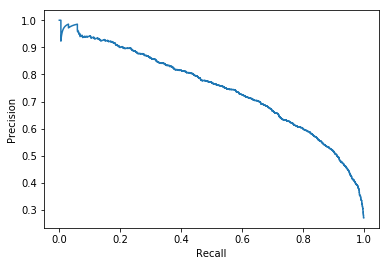

In [133]:
# Кривая precision-recall
# удобна для сравнения качества моделей

plt.plot(re, pr)# чем ближе к горизонтали при y=1 (precision), тем точнее
plt.xlabel('Recall')
plt.ylabel('Precision')

##### AUC

In [129]:
# считаем площадь под кривой
from sklearn.metrics import average_precision_score

In [132]:
# площадь под кривой AUC (area under curve)
average_precision_score( y_test, predictions[:, 1] )

0.7476659238049373

##### ROC

In [135]:
# посчитаем ROC-кривую (Receiver Operating Characteristic)
from sklearn.metrics import roc_curve

In [137]:
# получаем значения false и true positive rate для различных значений порога
fpr, tpr, thres = roc_curve( y_test, predictions[:, 1] )

In [138]:
for line in zip( fpr, tpr, thres ):
    print( line )

(0.0, 0.0, 1.990242584219799)
(0.0, 0.0004366812227074236, 0.9902425842197992)
(0.0, 0.005240174672489083, 0.9827895383811113)
(0.00013370771493515177, 0.005240174672489083, 0.9818229868242165)
(0.00013370771493515177, 0.030131004366812226, 0.9633052354454982)
(0.00026741542987030354, 0.030131004366812226, 0.9631555828365284)
(0.00026741542987030354, 0.059388646288209605, 0.9430182195438761)
(0.0006685385746757588, 0.059388646288209605, 0.9414602037065973)
(0.0006685385746757588, 0.05982532751091703, 0.9408529521383276)
(0.0008022462896109105, 0.05982532751091703, 0.9408381057972611)
(0.0008022462896109105, 0.062882096069869, 0.939422958699129)
(0.0009359540045460623, 0.062882096069869, 0.9394202449288394)
(0.0009359540045460623, 0.06419213973799126, 0.9386350539241841)
(0.0010696617194812142, 0.06419213973799126, 0.9385004238557098)
(0.0010696617194812142, 0.06768558951965066, 0.9365376283004884)
(0.0012033694344163659, 0.06768558951965066, 0.9361388843208793)
(0.0012033694344163659, 

(0.21112448188260463, 0.8593886462882097, 0.23553890006567335)
(0.21179302045728038, 0.8593886462882097, 0.23506777390910605)
(0.21179302045728038, 0.859825327510917, 0.2348377697088124)
(0.2125952667468913, 0.859825327510917, 0.2342507469099491)
(0.2125952667468913, 0.8602620087336245, 0.23406721541756204)
(0.21272897446182645, 0.8602620087336245, 0.23388192071113537)
(0.21272897446182645, 0.8606986899563319, 0.23383151860050097)
(0.2136649284663725, 0.8606986899563319, 0.2328892578459736)
(0.2136649284663725, 0.8611353711790393, 0.23263425956154846)
(0.21473459018585372, 0.8611353711790393, 0.23098642347778264)
(0.21473459018585372, 0.8620087336244542, 0.23087635721671715)
(0.21580425190533495, 0.8620087336244542, 0.23020518051311076)
(0.21580425190533495, 0.8624454148471615, 0.23018646590321554)
(0.21607166733520525, 0.8624454148471615, 0.22902562575950847)
(0.21607166733520525, 0.862882096069869, 0.22897371140973366)
(0.21687391362481614, 0.862882096069869, 0.2287754790700117)
(0.2

Text(0,0.5,'True Positive Rate (TPR)')

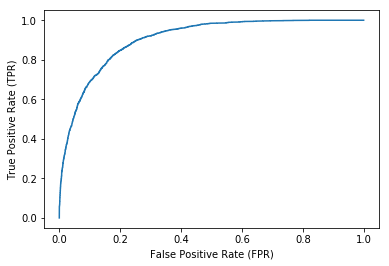

In [140]:
plt.plot( fpr, tpr )
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')

### 5.2. Построение и оценка модели: linear_model и дерево решений Decision Tree

In [195]:
# импортируем нужные библиотеки
from sklearn import linear_model
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

import matplotlib.pyplot as plt

# определим классификаторы
ll = linear_model.Lasso(alpha=0)
dt = DecisionTreeClassifier()

In [196]:
# упакуем в словарь классификторы
classifiers = {'LASSO': ll, 'Decision Tree': dt}

In [197]:
# групповое обучение
for name, clf in classifiers.items():
    clf.fit(x_train_normed, y_train)
    print(name, '--- ОБУЧЕН')
    %time



C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  
C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:478: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


LASSO --- ОБУЧЕН
Wall time: 0 ns
Decision Tree --- ОБУЧЕН
Wall time: 0 ns


In [198]:
# проверяем результаты LASSO
prediction2 = classifiers['LASSO'].predict(x_test_normed)
prediction2

array([ 0.01684653,  0.03692336,  0.50747448, ...,  0.417634  ,
       -0.00330055,  0.63619753])

In [200]:
# округляем результаты LASSO
prediction2 = np.abs(np.round_(classifiers['LASSO'].predict(x_test_normed), decimals=0, out=None))
prediction2

array([0., 0., 1., ..., 0., 0., 1.])

In [201]:
# проверяем результаты Decision Tree
prediction3 = classifiers['Decision Tree'].predict(x_test_normed)
prediction3

array([0, 0, 0, ..., 0, 0, 1])

Визуализируем

In [202]:
def show_auc(y, y_pred, plot_label=''): 
    """
    Функция выводит метрику AUC score для Train и Test
    и рисует график TPR-FPR
    Например: 
    LASSO
    Train AUC score: 0.8972723655341475
    Test AUC score: 0.8990221528576959
    и ниже график
    """
    fpr, tpr, _ = roc_curve(y, y_pred)
    auc_val = auc(fpr, tpr)
    plt.plot([0,1], [0,1], '--', c='g')
    plt.plot(fpr, tpr, label=plot_label)
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.legend(loc=4)

LASSO
Train AUC score:	 0.8972723655341475
Test AUC score: 	 0.8990221528576959


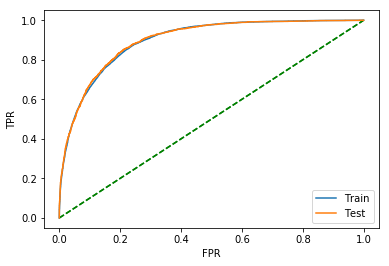

Decision Tree
Train AUC score:	 0.9989358305842291
Test AUC score: 	 0.7084551445648982


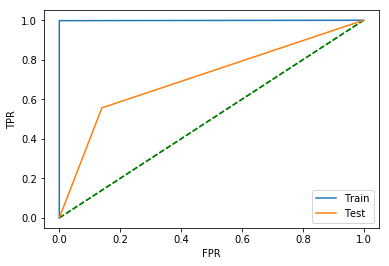

In [208]:
for name, clf in classifiers.items():
    print(name)
    print('Train AUC score:\t', roc_auc_score(y_train, clf.predict(x_train_normed)))
    print('Test AUC score: \t', roc_auc_score(y_test, clf.predict(x_test_normed)))
    show_auc(y_train, clf.predict(x_train_normed), plot_label='Train')
    show_auc(y_test, clf.predict(x_test_normed), plot_label='Test')
    plt.show()


Попробуем улучшить результат Decision Tree (боремся с переобучением)

In [211]:
from sklearn.model_selection import GridSearchCV

grid = {'max_depth': np.arange(2, 20), # переберем глубину
        'max_leaf_nodes': np.arange(45, 56) # переберем максимальное количество листьев (по дефолту нет ограничения)
        }

gridsearch = GridSearchCV(dt, grid, scoring='roc_auc', cv=4, n_jobs=-1)

In [212]:
# найдем лучшие параметры
%time
gridsearch.fit(x_train_normed, y_train)
gridsearch.best_params_

Wall time: 0 ns


{'max_depth': 8, 'max_leaf_nodes': 55}

In [214]:
# заново обучим дерево
dt = DecisionTreeClassifier(max_depth=8, max_leaf_nodes=55)

In [215]:
# Использованную ранее логичтическую регрессию определим и добавим в словарь классификаторов
lr = LogisticRegression()

In [216]:
classifiers = {'LogisticRegression': lr, 'LASSO': ll, 'Decision Tree': dt}

In [217]:
# обучение
for name, clf in classifiers.items():
    clf.fit(x_train_normed, y_train)
    print(name, '--- ОБУЧЕН')
    %time


C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression --- ОБУЧЕН
Wall time: 0 ns


C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  
C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:478: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


LASSO --- ОБУЧЕН
Wall time: 0 ns
Decision Tree --- ОБУЧЕН
Wall time: 0 ns


In [218]:
prediction = classifiers['LogisticRegression'].predict(x_test_normed)
prediction

array([0, 0, 1, ..., 0, 0, 1])

In [219]:
prediction2 = np.abs(np.round_(classifiers['LASSO'].predict(x_test_normed), decimals=0, out=None))
prediction2

array([0., 0., 1., ..., 0., 0., 1.])

In [220]:
prediction3 = classifiers['Decision Tree'].predict(x_test_normed)
prediction3

array([0, 0, 1, ..., 0, 0, 1])

LogisticRegression
Train AUC score:	 0.7609536116947501
Test AUC score: 	 0.7683503620910018


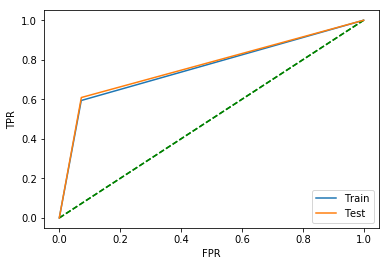

LASSO
Train AUC score:	 0.8972723655341475
Test AUC score: 	 0.8990221528576959


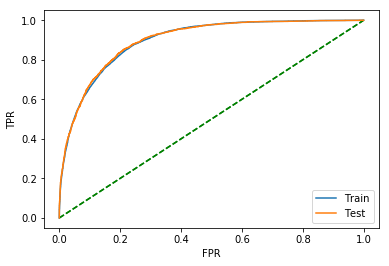

Decision Tree
Train AUC score:	 0.7373908618528657
Test AUC score: 	 0.7335325227959976


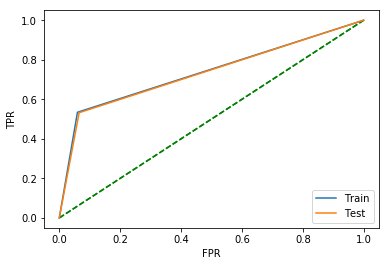

In [221]:
# отрисуем графики
for name, clf in classifiers.items():
    print(name)
    print('Train AUC score:\t', roc_auc_score(y_train, clf.predict(x_train_normed)))
    print('Test AUC score: \t', roc_auc_score(y_test, clf.predict(x_test_normed)))
    show_auc(y_train, clf.predict(x_train_normed), plot_label='Train')
    show_auc(y_test, clf.predict(x_test_normed), plot_label='Test')
    plt.show()

LogisticRegression
Train AUC score:	 0.9031728794208267
Test AUC score: 	 0.9048585238084396


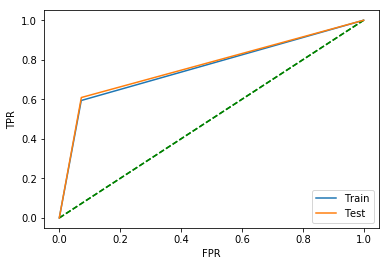

LASSO
Train AUC score:	 0.8972723655341475
Test AUC score: 	 0.8990221528576959


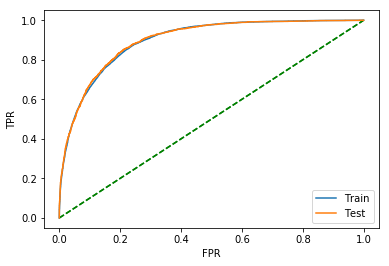

Decision Tree
Train AUC score:	 0.8873321281352924
Test AUC score: 	 0.8834285927817686


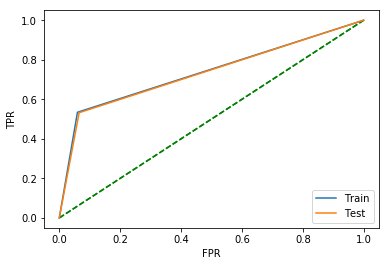

In [222]:
# немного доработаем цикл, т.к. не у всех методов есть predict_proba (н-р у Лассо). Получим более справедливые результаты AUC score
for name, clf in classifiers.items():
    print(name)
    try:
        print('Train AUC score:\t', roc_auc_score(y_train, clf.predict_proba(x_train_normed)[:,1]))
    except:
        print('Train AUC score:\t', roc_auc_score(y_train, clf.predict(x_train_normed)))
    try:
        print('Test AUC score: \t', roc_auc_score(y_test, clf.predict_proba(x_test_normed)[:,1]))
    except:
        print('Test AUC score: \t', roc_auc_score(y_test, clf.predict(x_test_normed)))
    show_auc(y_train, clf.predict(x_train_normed), plot_label='Train')
    show_auc(y_test, clf.predict(x_test_normed), plot_label='Test')
    plt.show()

Благодаря перебору параметров удалось улучшить AUC score для Decision Tree